# CNN 심화

## [예제3] VGG-16 Feature Map

> ### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


>### Load modules

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Load VGG16 Model

In [3]:
from tensorflow.keras.applications import VGG16

model = VGG16(weights="imagenet")

model.summary() 

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

> ### Summarize Filter Shape

In [4]:
for i, layer in enumerate(model.layers):
  if 'conv' not in layer.name:
    continue

  filters, biases = layer.get_weights()
  print(i,': ', layer.name, filters.shape)

1 :  block1_conv1 (3, 3, 3, 64)
2 :  block1_conv2 (3, 3, 64, 64)
4 :  block2_conv1 (3, 3, 64, 128)
5 :  block2_conv2 (3, 3, 128, 128)
7 :  block3_conv1 (3, 3, 128, 256)
8 :  block3_conv2 (3, 3, 256, 256)
9 :  block3_conv3 (3, 3, 256, 256)
11 :  block4_conv1 (3, 3, 256, 512)
12 :  block4_conv2 (3, 3, 512, 512)
13 :  block4_conv3 (3, 3, 512, 512)
15 :  block5_conv1 (3, 3, 512, 512)
16 :  block5_conv2 (3, 3, 512, 512)
17 :  block5_conv3 (3, 3, 512, 512)


> ### Filter Map

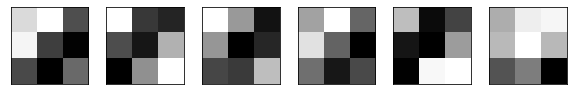

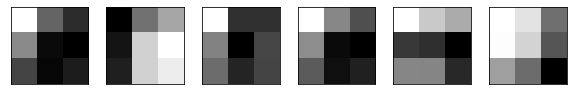

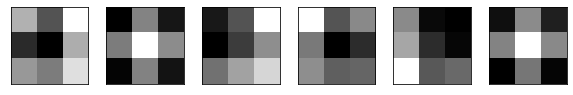

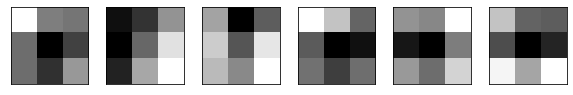

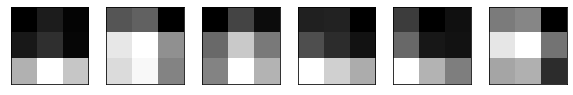

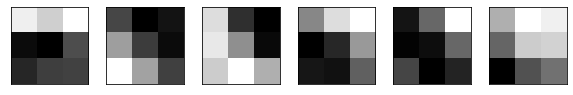

In [5]:
filters, biases = model.layers[2].get_weights() # filters: (3, 3, 64, 64)
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min) # 0 ~ 1 로 정규화
n_filters = 6
for i in range(n_filters):				# 64개 채널 중 6 채널만 보기
	f = filters[:, :, :, i]
	plt.figure(figsize=(10,10))
	for j in range(6):							# 필터 1개가 64층인데 6층만 보기
		p_num = i * n_filters + j
		ax = plt.subplot(n_filters, n_filters, p_num+1)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(f[:, :, j], cmap='gray')
plt.show()

> ### Prepare Test Image

(1, 224, 224, 3)


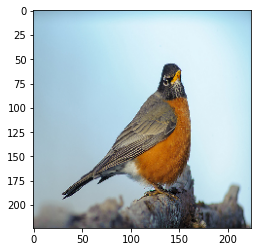

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

img_path = '/content/drive/My Drive/files/images/bird.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # 파일을 이미지로 로딩
plt.imshow(img)                                        # 이미지 그리기
img = image.img_to_array(img)                          # 이미지를 ndarray로 변경: (224,224,3)
img = np.expand_dims(img, axis=0)                      # 차원 확장: (1,224,224,3)
img = preprocess_input(img)                            # VGG-16 모델 입력에 맞도록 전처리
print(img.shape)

> ### n x n ploting function

In [7]:
def square(imgs, n): # n x n 개의 그림 그리는 함수
  img_num = n
  plt.figure(figsize=(10,10))
  for i in range(n):
    for j in range(n):
      p_num = i * n + j         
      ax = plt.subplot(n, n, p_num+1)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(imgs[0, :, :, p_num], cmap='gray')
  plt.show()

## Visualize feature maps output from each block in the VGG model

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

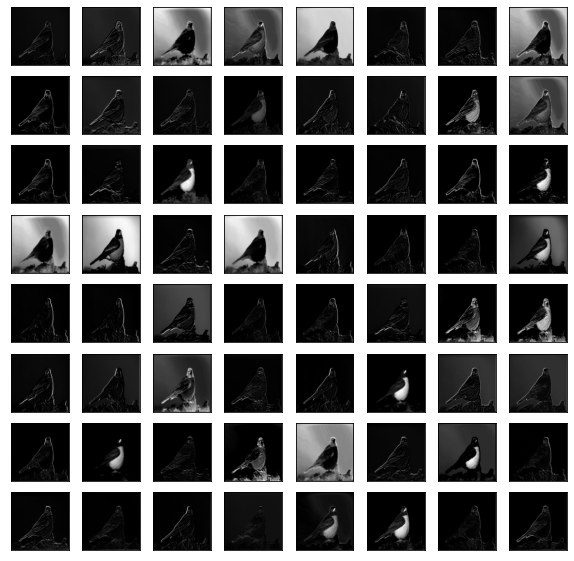

block2_conv2


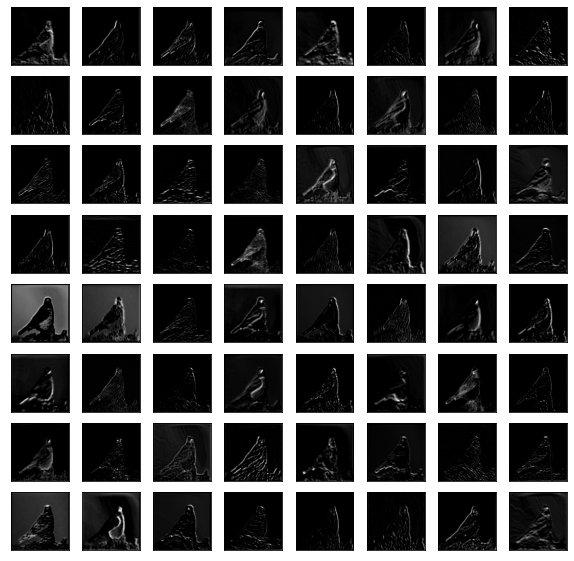

block3_conv3


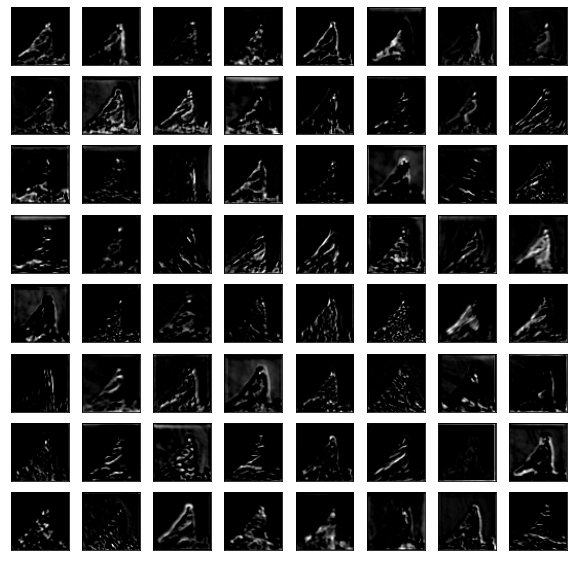

block4_conv3


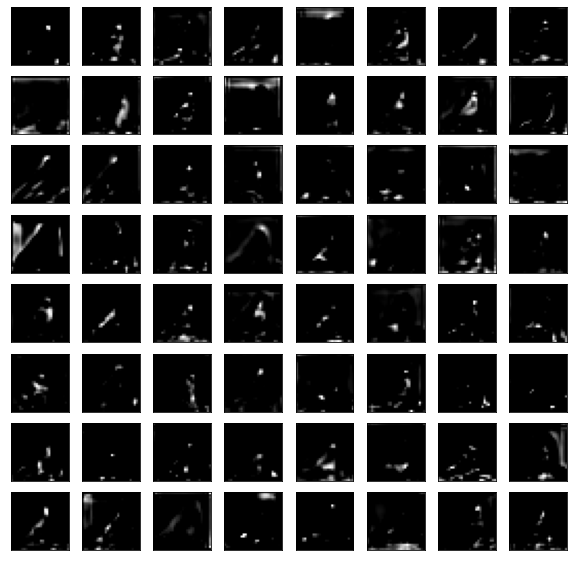

block5_conv3


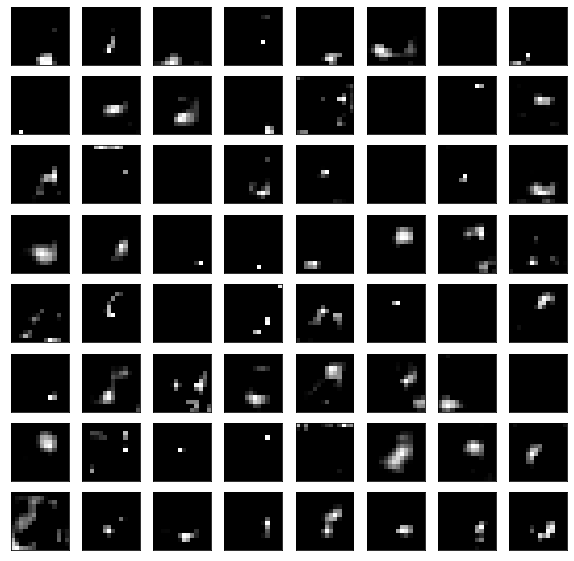

In [8]:
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs] # 다수의 output 설정
model_fm = tf.keras.models.Model(inputs=model.inputs, outputs=outputs) # 새로운 모델 생성: input은 동일, output은 다수
model_fm.summary()
feature_maps = model_fm.predict(img) # 모델을 돌려 다수의 출력을 저장
layers_names = model_fm.output_names # output의 이름을 저장
for i, fmap in enumerate(feature_maps): # output을 하나씩 그려줌, output은 곧 Feature map, 8x8=64개 채널만 그려줌
  print(layers_names[i])
  square(fmap, 8)